In [3]:
pd.read_csv('train.csv')

,writer,page_id,language,same_text,tortuosityHist10[0],tortuosityHist10[1],tortuosityHist10[2],tortuosityHist10[3],tortuosityHist10[4],tortuosityHist10[5],...,directions_hist1a2a3a4a5a6a7a8a9a10_220[210],directions_hist1a2a3a4a5a6a7a8a9a10_220[211],directions_hist1a2a3a4a5a6a7a8a9a10_220[212],directions_hist1a2a3a4a5a6a7a8a9a10_220[213],directions_hist1a2a3a4a5a6a7a8a9a10_220[214],directions_hist1a2a3a4a5a6a7a8a9a10_220[215],directions_hist1a2a3a4a5a6a7a8a9a10_220[216],directions_hist1a2a3a4a5a6a7a8a9a10_220[217],directions_hist1a2a3a4a5a6a7a8a9a10_220[218],directions_hist1a2a3a4a5a6a7a8a9a10_220[219]
0,1,1,Arabic,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002457,0.002633,0.002698,0.002929,0.003014,0.003225,0.003572,0.003957,0.004232,0.004804
1,1,2,Arabic,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002498,0.002641,0.002836,0.002999,0.003246,0.003456,0.003709,0.003994,0.004308,0.004706
2,1,3,English,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002090,0.002440,0.002831,0.003078,0.003438,0.003732,0.004100,0.004329,0.004687,0.004879
3,1,4,English,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002435,0.002823,0.003117,0.003441,0.003788,0.004056,0.004285,0.004527,0.004843,0.005085
4,2,1,Arabic,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002465,0.002724,0.003079,0.003305,0.003425,0.003403,0.003450,0.003626,0.003977,0.004547
5,2,2,Arabic,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002535,0.002808,0.002942,0.003151,0.003247,0.003246,0.003433,0.003516,0.003787,0.004377
6,2,3,English,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002887,0.003271,0.003569,0.003793,0.004049,0.004214,0.004339,0.004598,0.004874,0.005211
7,2,4,English,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002945,0.003295,0.003569,0.003846,0.004083,0.004329,0.004566,0.004850,0.005092,0.005397
8,3,1,Arabic,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002245,0.002325,0.002383,0.002515,0.002725,0.003046,0.003304,0.003629,0.004037,0.004564
9,3,2,Arabic,1,0.928750,0.004071,0.001876,0.000000,0.018031,0.025427,...,0.002179,0.002267,0.002385,0.002550,0.002723,0.002836,0.003049,0.003373,0.003757,0.004354


In [1]:
from data import getDataset, getLabels, getLangData
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns

def data():
    labels = getLabels('train_answers.csv')
    [X_, y] = getDataset('train.csv', labels)
    X = X_[:, 4:]
    [Xtest_, ytest] = getDataset('test.csv', labels)
    Xtest = Xtest_[:, 4:]
    return [X, y, Xtest, ytest]

def plot_data(X, y, s=25):
    plt.scatter(X[:,6000], X[:,6002], c=y, cmap='rainbow', edgecolors='k', s=s)
    
def getAccScore(truth, predicted):
    return accuracy_score(truth, predicted), recall_score(truth, predicted), precision_score(truth, predicted)


dataa = pd.read_csv("train.csv")
[X, y, Xtest, ytest] = data()

plt.figure(figsize=(13,8))
plot_data(X, y)
plt.xlabel(dataa.columns[6004])
plt.ylabel(dataa.columns[6006])
plt.title('Örnek Veri')

Text(0.5, 1.0, 'Örnek Veri')

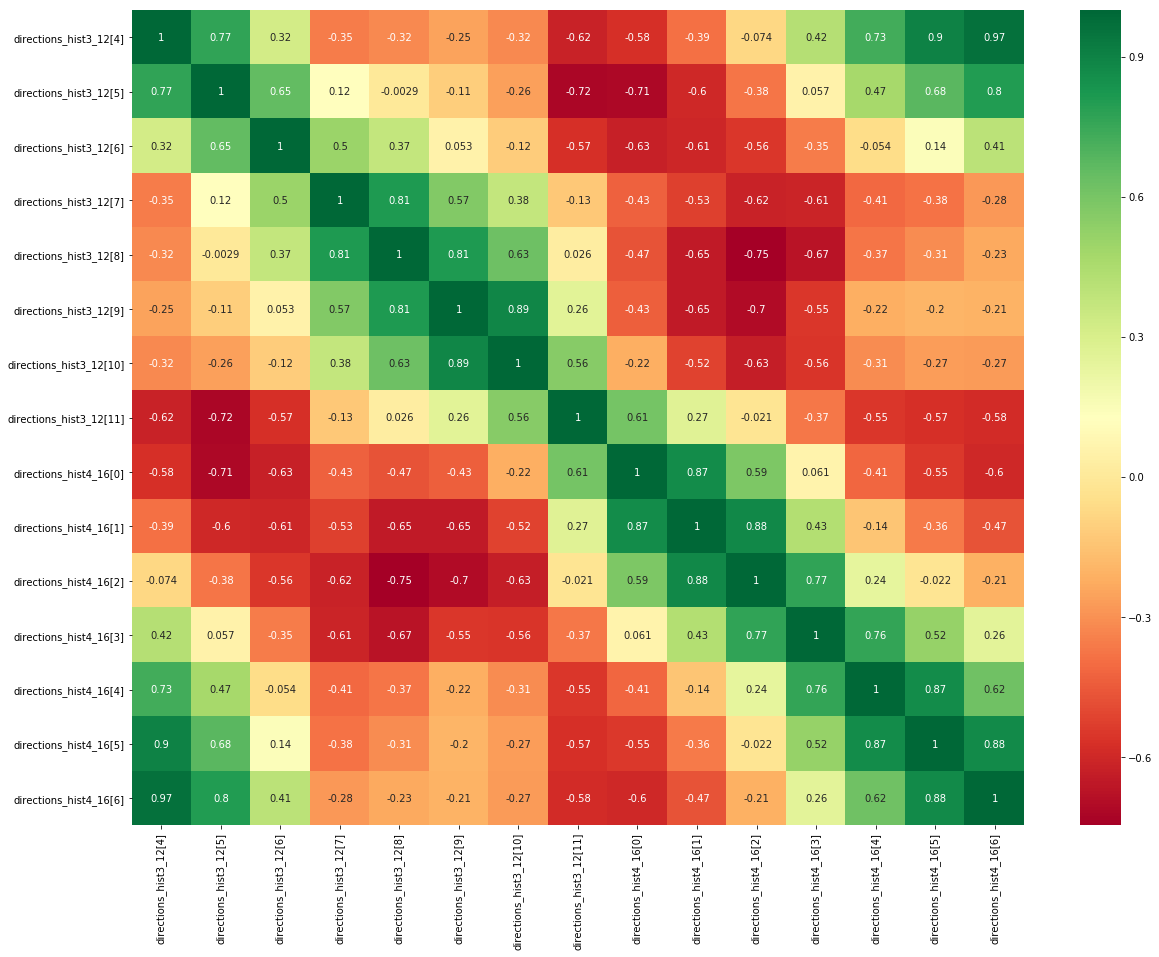

In [2]:
x = dataa.iloc[:,5990:6005]  #independent columns
corrmat = x.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,15))
#plot heat map
g=sns.heatmap(dataa[top_corr_features].corr(),annot=True,cmap="RdYlGn")

C:\Users\Metin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Accuracy: 0.7583333333333333


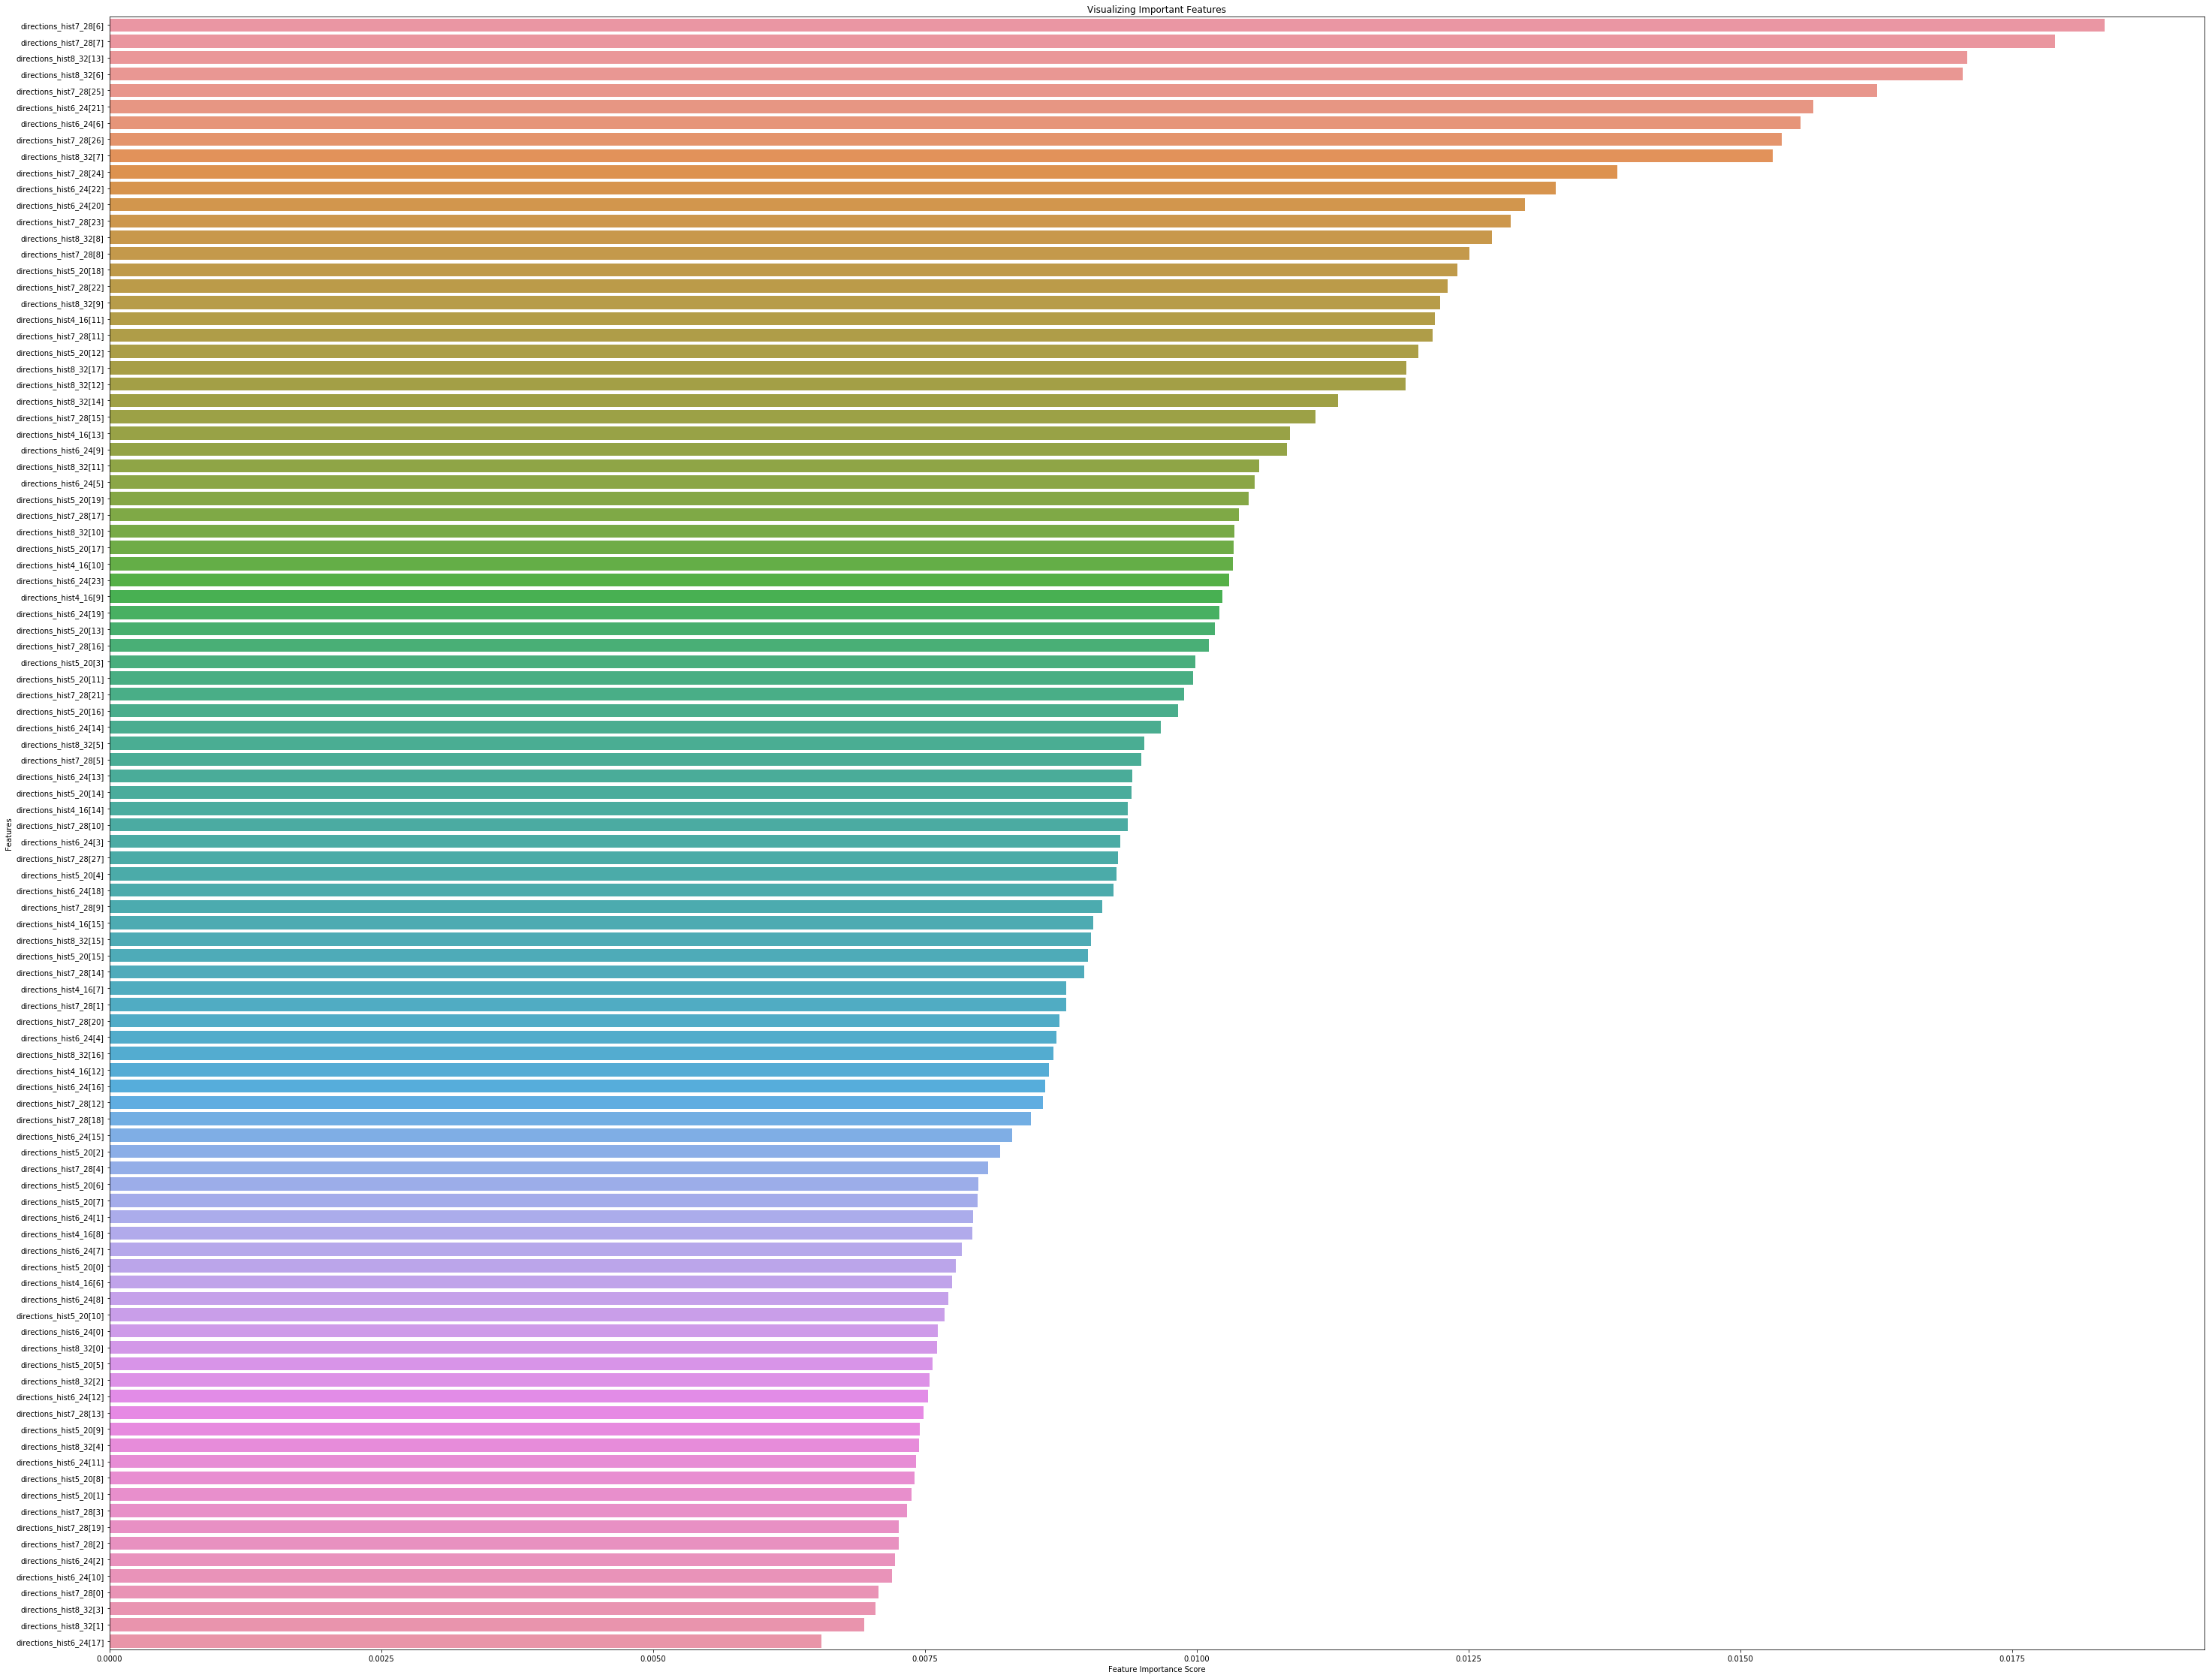

In [3]:

    
y = pd.DataFrame(y)
X = dataa.iloc[:, 4:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#RANDOM FOREST FEATURES SELECTION

features_labels = list(X.iloc[:,6000:6100].columns.values) 

clf = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt', criterion = 'entropy', n_jobs = 2)
clf.fit(X_train.iloc[:,6000:6100], y_train)
predicted = clf.predict(X_test.iloc[:,6000:6100]) 
feature_imp = pd.Series(clf.feature_importances_,index=features_labels).sort_values(ascending=False)
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:",accuracy)
    

plt.figure(figsize=(50,40))
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
sns.barplot(x=feature_imp, y=feature_imp.index)

In [4]:
features_labels = list(X.columns.values) 

clf = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt', criterion = 'entropy', n_jobs = 2)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test) 
feature_imp = pd.Series(clf.feature_importances_,index=features_labels).sort_values(ascending=False)
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:",accuracy)

C:\Users\Metin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 0.7541666666666667


In [92]:
a = feature_imp[feature_imp > 0.0002]
X_train = X_train[a.index]
X_test = X_test[a.index]

clf = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt', criterion = 'entropy', n_jobs = 2)
clf.fit(X_train, y_train)
predicted = clf.predict(X_train) 
acc, rcll, pre  = getAccScore(y_train, predicted)
    
print("Random Forest")
print('Train Accuracy: ', acc)

predicted = clf.predict(X_test) 
acc, rcll, pre  = getAccScore(y_test, predicted)

print('\nAccuracy: ', acc)
print('Precision: ', pre)
print('Recall: ', rcll)

C:\Users\Metin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest
Train Accuracy:  1.0

Accuracy:  0.7708333333333334
Precision:  0.8115942028985508
Recall:  0.7943262411347518


In [60]:
a.shape

(2019,)

In [88]:
    lg = LogisticRegression(C = 20000)
    lg.fit(X_train, y_train)
    predicted = lg.predict(X_train) 

    acc, rcll, pre  = getAccScore(y_train, predicted)
    
    print("Logistic Regression")
    print('Train Accuracy: ', acc)
    
    predicted = lg.predict(X_test) 
    acc, rcll, pre  = getAccScore(y_test, predicted)
    
    print('\nTest Accuracy: ', acc)
    print('Precision: ', pre)
    print('Recall: ', rcll)

C:\Users\Metin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Metin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression
Train Accuracy:  0.9464285714285714

Test Accuracy:  0.7083333333333334
Precision:  0.7553956834532374
Recall:  0.7446808510638298


In [90]:
    svm = SVC(C = 10, gamma = 15, probability = True)
    svm.fit(X_train, y_train)
    predicted = svm.predict(X_train)
    
    acc, rcll, pre  = getAccScore(y_train, predicted)
    
    print("SVM")
    print('Train Accuracy: ', acc)

    
    predicted = svm.predict(X_test)
    acc, rcll, pre  = getAccScore(y_test, predicted)
    
    print('\nAccuracy: ', acc)
    print('Precision: ', pre)
    print('Recall: ', rcll)

C:\Users\Metin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM
Train Accuracy:  0.9892857142857143

Accuracy:  0.8208333333333333
Precision:  0.8656716417910447
Recall:  0.8226950354609929


In [ ]:


def langData():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    answers = pd.read_csv('train_answers.csv')
    features_labels = list(train.columns.values[5:]) 
    X = train[features_labels].values
    Xtest = test[features_labels].values
    y_ = answers['male'].values
    y = y_[0:200]
    ytest = y_[200:]
    y = np.repeat(y, 4, axis = 0)
    ytest = np.repeat(ytest, 4, axis = 0)

    [X_arabic, X_english] = getLangData(X)
    [y_arabic, y_english] = getLangData(y)
    [X_arabic_test, X_english_test] = getLangData(Xtest)
    [y_arabic_test, y_english_test] = getLangData(ytest)
    ytest = y_english_test
    
    return [X_arabic, y_arabic, X_arabic_test, X_english, y_english, X_english_test, ytest]


    
    
    
    #LOGISTIC REGRESSION
    
    lg = LogisticRegression(C = 150, solver='lbfgs', multi_class='multinomial')
    lg.fit(X[:,5970:6003], y)
    y_predicted = lg.predict(Xtest[:,5970:6003])

    
    acc, rcll, pre  = getAccScore(ytest, y_predicted)
    
    print("Logistic Regression")
    print('Accuracy: ', acc)
    print('Precision: ', pre)
    print('Recall: ', rcll)
    

